<a href="https://colab.research.google.com/github/eeolga/article/blob/main/3D_KLO2024_updated_data_corelation_training_25_09_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
import pandas as pd

In [ ]:
CAD_path="/content/CAD_KLO_24092024.xlsx"

CAD_logs file data

In [ ]:
data = pd.read_excel("/content/CAD_KLO_24092024.xlsx")

In [ ]:
display(pd.DataFrame(data))

,user_id,tool_id,competency,competency_weight,tool_weight,activity_id,activity_weight,date,time1
0,29455,233156,2,0.03,0.0526,20807,0.0812,2024-05-17,13:10:11
1,29487,233156,2,0.03,0.0526,20807,0.0812,2024-05-17,11:08:15
2,27057,233156,2,0.03,0.0526,20807,0.0812,2024-05-03,12:54:56
3,26646,233156,2,0.03,0.0526,20807,0.0812,2024-04-24,10:08:54
4,26646,233156,2,0.03,0.0526,20807,0.0812,2024-04-24,10:08:28
...,...,...,...,...,...,...,...,...,...
3617,26646,233140,2,0.03,0.0526,10403,0.0812,2024-03-07,08:56:05
3618,26646,233140,2,0.03,0.0526,10403,0.0812,2024-03-07,08:48:58
3619,26965,233140,2,0.03,0.0526,10403,0.0812,2024-03-04,09:24:54
3620,26393,233140,2,0.03,0.0526,10403,0.0812,2024-03-04,09:22:58


Feature Engineering

In [ ]:
df = pd.read_excel("/content/CAD_KLO_24092024.xlsx")
test_df = pd.read_excel("/content/CAD_KLO_24092024.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3622 entries, 0 to 3621
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            3622 non-null   int64         
 1   tool_id            3622 non-null   int64         
 2   competency         3622 non-null   int64         
 3   competency_weight  3622 non-null   float64       
 4   tool_weight        3622 non-null   float64       
 5   activity_id        3622 non-null   int64         
 6   activity_weight    3622 non-null   float64       
 7   date               3622 non-null   datetime64[ns]
 8   time1              3622 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 254.8+ KB


In [ ]:
def feature_engineering(df): #feature engineering function

    return df

In [ ]:
df = feature_engineering(df)

In [ ]:
df = df.drop(['date'], axis=1) # Remove columns I no longer need

In [ ]:
def scale_min_max(df, col_name, xmin, xmax):  # Normalization
    df[col_name] = (df[col_name] - xmin) / (xmax - xmin)
    return df

train_activity_min = df['competency_weight'].min()
train_activity_max = df['competency_weight'].max()
df = scale_min_max(df, 'competency_weight', train_activity_min, train_activity_max)

df['competency_weight'].describe()

,competency_weight
count,3622.000000
mean,0.732744
std,0.264223
min,0.000000
25%,0.500000
50%,0.666667
75%,1.000000
max,1.000000


Data correlation

In [ ]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:16], all_data.loc[16:].drop(['date'], axis=1)

df_train = pd.read_excel("/content/CAD_KLO_24092024.xlsx")
df_test = pd.read_excel("/content/CAD_KLO_24092024.xlsx")


df_train.name = 'Training Set'
df_test.name = 'Test Set'


dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['activity_weight'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 3622
Number of Test Examples = 3622

Training X Shape = (3622, 9)
Training y Shape = 3622

Test X Shape = (3622, 9)
Test y Shape = 3622

Index(['user_id', 'tool_id', 'competency', 'competency_weight', 'tool_weight',
       'activity_id', 'activity_weight', 'date', 'time1'],
      dtype='object')
Index(['user_id', 'tool_id', 'competency', 'competency_weight', 'tool_weight',
       'activity_id', 'activity_weight', 'date', 'time1'],
      dtype='object')


In [ ]:
# Ensure 'data' column is dropped from both training and test datasets
df_train_cleaned = df_train.drop(['date'], axis=1)
df_test_cleaned = df_test.drop(['date'], axis=1)

In [ ]:
# Verify all columns in df_train_cleaned and df_test_cleaned are numeric
numeric_columns_train = df_train_cleaned.select_dtypes(include=[int, float]).columns
numeric_columns_test = df_test_cleaned.select_dtypes(include=[int, float]).columns

In [ ]:
# Compute correlations only on numeric columns
df_train_corr = df_train_cleaned[numeric_columns_train].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)


In [ ]:
df_test_corr = df_test_cleaned[numeric_columns_test].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [ ]:
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1 # Training set correlations
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
8,tool_weight,activity_weight,0.999748
10,tool_weight,competency,0.996756
12,competency,activity_weight,0.996520
14,competency,competency_weight,0.990508
16,competency_weight,tool_weight,0.986564
18,competency_weight,activity_weight,0.986538
20,activity_id,competency,0.899769
22,tool_weight,activity_id,0.898758
24,activity_id,activity_weight,0.897277
26,competency_weight,activity_id,0.895578


In [ ]:
corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
8,tool_weight,activity_weight,0.999748
10,tool_weight,competency,0.996756
12,competency,activity_weight,0.996520
14,competency,competency_weight,0.990508
16,competency_weight,tool_weight,0.986564
18,competency_weight,activity_weight,0.986538
20,activity_id,competency,0.899769
22,tool_weight,activity_id,0.898758
24,activity_id,activity_weight,0.897277
26,competency_weight,activity_id,0.895578


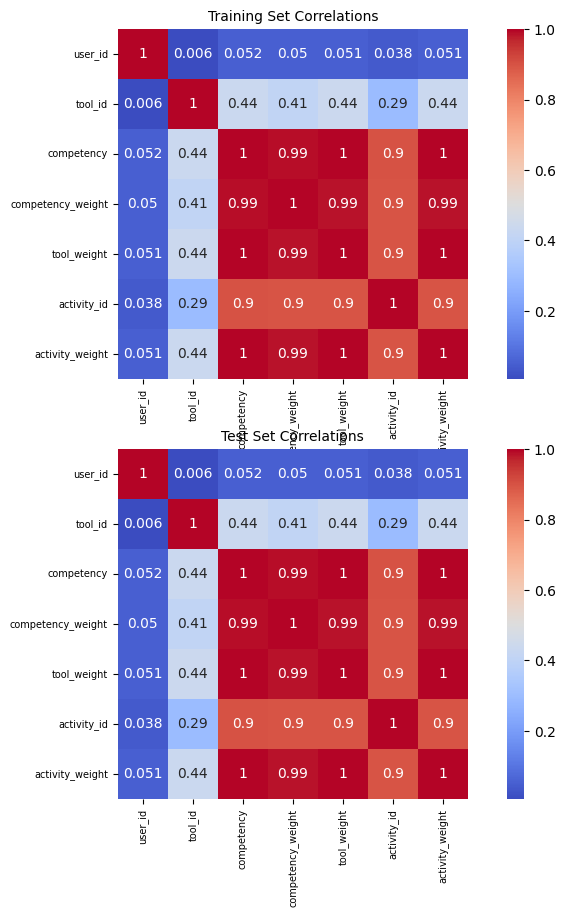

In [ ]:
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module
import seaborn as sns

fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

# Convert 'date' column to datetime objects if it's not already
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

# Exclude 'date' column from correlation calculation and drop non-numeric columns
sns.heatmap(df_train.drop(['date'], axis=1).select_dtypes(include=['number']).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
sns.heatmap(df_test.drop(['date'], axis=1).select_dtypes(include=['number']).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=7)
    axs[i].tick_params(axis='y', labelsize=7)

axs[0].set_title('Training Set Correlations', size=10)
axs[1].set_title('Test Set Correlations', size=10)

plt.show()

Index(['user_id', 'tool_id', 'competency', 'competency_weight', 'tool_weight',
       'activity_id', 'activity_weight', 'date', 'time1'],
      dtype='object')
Non-numeric columns: Index(['date', 'time1'], dtype='object')
Epoch [5/50], Loss: 0.5836, Val Loss: 0.5732
Epoch [10/50], Loss: 0.5132, Val Loss: 0.4996
Epoch [15/50], Loss: 0.4213, Val Loss: 0.4036
Epoch [20/50], Loss: 0.3090, Val Loss: 0.2900
Epoch [25/50], Loss: 0.1961, Val Loss: 0.1792
Epoch [30/50], Loss: 0.1059, Val Loss: 0.0947
Epoch [35/50], Loss: 0.0509, Val Loss: 0.0453
Epoch [40/50], Loss: 0.0241, Val Loss: 0.0217
Epoch [45/50], Loss: 0.0122, Val Loss: 0.0112
Epoch [50/50], Loss: 0.0069, Val Loss: 0.0066


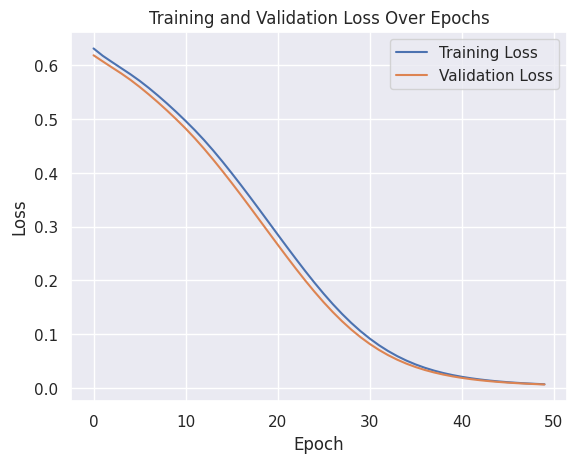

In [ ]:
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
sns.set(style="darkgrid")

# Load Data from Excel
file_path = '/content/CAD_KLO_24092024.xlsx'
data = pd.read_excel(file_path)

# Print the column names to verify 'activity_weight' exists
print(data.columns)

# Assuming your Excel file has columns 'features' and 'target'
# Adjust 'time' to the actual column name if necessary
X = data.drop(['competency_weight', 'user_id'], axis=1) # Pass a list of columns to drop
Y = data['competency_weight'].values # Select only competency_weight as the target variable

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Handle non-numeric columns (example: drop them)
X = X.drop(non_numeric_cols, axis=1).values

# Ensure target values are 0 or 1
Y = (Y == 1).astype(float)

#  Preprocess Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#  Preprocess Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1) # Ensure Y_train has the correct shape
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1) # Ensure Y_test has the correct shape

# Define the Model
class ImprovedNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x

input_dim = X_train.shape[1]
model = ImprovedNN(input_dim)

# Define Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the Model
num_epochs = 50
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())

    #Corrected indentation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test) # Calculate validation set outputs
        val_loss = criterion(val_outputs, Y_test)
        validation_losses.append(val_loss.item())

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


In [ ]:
# Evaluate the Model
model.eval()
with torch.no_grad():
    raw_outputs = model(X_test)
    print(f'Raw outputs (first 10): {raw_outputs[:10].flatten()}')

    # Adjust threshold if necessary
    threshold = 0.5
    Y_predicted = (raw_outputs > threshold).float()
    unique_values = Y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

    Y_test_flat = Y_test.flatten()
    if len(unique_values) == 1:
        print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
    else:
        print(classification_report(Y_test_flat, Y_predicted, target_names=['class 0', 'class 1']))

Raw outputs (first 10): tensor([0.0221, 0.0221, 0.0027, 0.0027, 0.0221, 0.0160, 0.0156, 0.0027, 0.0156,
        0.0027])
Unique values in predictions with threshold 0.5: tensor([0.])
Only one class (0.0) predicted with threshold 0.5.


In [ ]:
# Evaluate the Model
model.eval()
with torch.no_grad():
    raw_outputs = model(X_test)
    print(f'Raw outputs (first 10): {raw_outputs[:10].flatten()}')

    # Adjust threshold if necessary
    threshold = 0.5
    Y_predicted = (raw_outputs > threshold).float()
    unique_values = Y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

    Y_test_flat = Y_test.flatten()
    if len(unique_values) == 1:
        print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
    else:
        print(classification_report(Y_test_flat, Y_predicted, target_names=['class 0', 'class 1']))

Raw outputs (first 10): tensor([0.0221, 0.0221, 0.0027, 0.0027, 0.0221, 0.0160, 0.0156, 0.0027, 0.0156,
        0.0027])
Unique values in predictions with threshold 0.5: tensor([0.])
Only one class (0.0) predicted with threshold 0.5.


In [ ]:
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Load Data from Excel
file_path = '/content/CAD_KLO_24092024.xlsx'
data = pd.read_excel(file_path)

# Print the column names to verify 'activity_weight' exists
print(data.columns)

# Assuming your Excel file has columns 'features' and 'target'
# Adjust 'time' to the actual column name if necessary
X = data.drop(['competency_weight', 'tool_id'], axis=1) # Pass column labels as a list
y = data[['competency_weight', 'tool_id']].values # Select multiple columns using a list of labels

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Handle non-numeric columns (example: drop them)
X = X.drop(non_numeric_cols, axis=1).values

# Ensure target values are 0 or 1
y = (y == 1).astype(float)

Index(['user_id', 'tool_id', 'competency', 'competency_weight', 'tool_weight',
       'activity_id', 'activity_weight', 'date', 'time1'],
      dtype='object')
Non-numeric columns: Index(['date', 'time1'], dtype='object')


In [ ]:
# Evaluate the Model
model.eval()
with torch.no_grad():
    raw_outputs = model(X_test)
    print(f'Raw outputs (first 10): {raw_outputs[:10].flatten()}')

    # Adjust threshold if necessary
    threshold = 0.3
    Y_predicted = (raw_outputs > threshold).float()
    unique_values = Y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

    Y_test_flat = Y_test.flatten()
    if len(unique_values) == 1:
        print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
    else:
        print(classification_report(Y_test_flat, Y_predicted, target_names=['class 0', 'class 1']))

Raw outputs (first 10): tensor([0.0221, 0.0221, 0.0027, 0.0027, 0.0221, 0.0160, 0.0156, 0.0027, 0.0156,
        0.0027])
Unique values in predictions with threshold 0.3: tensor([0.])
Only one class (0.0) predicted with threshold 0.3.
